# Phase 2: Data Exploration - PATH Study Waves 1-5
## Smoking Cessation Prediction Project

**Objectives:**
1. Load all 5 waves of PATH Study adult data
2. Explore data structure and variables
3. Identify baseline smokers in each wave
4. Create person-period pooled dataset
5. Calculate cessation rates
6. Save processed data for modeling

---

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Add src to path
sys.path.append('../src')

# Set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Load Wave 1 and Explore Structure

First, let's load Wave 1 to understand the data structure and identify key variables.

In [17]:
# Load Wave 1
wave1 = pd.read_stata('../data/raw/PATH_W1_Adult_Public.dta')

print(f"Wave 1 shape: {wave1.shape}")
print(f"Number of observations: {len(wave1):,}")
print(f"Number of variables: {len(wave1.columns):,}")
print("\nFirst few rows:")
wave1.head()

Wave 1 shape: (32320, 1742)
Number of observations: 32,320
Number of variables: 1,742

First few rows:


,CASEID,PERSONID,R01_AC1002,R01_AC1003,R01_AC0100,R01_AC0102,R01_AC0103,R01_AC1004,R01_AE1001,R01_AE1002,R01_AE1003,R01_AE0100,R01_AE0102,R01_AE0103,R01_AE1004,R01_AG1001,R01_AG9002_01,R01_AG9002_02,R01_AG9003,R01_AG9004,R01_AG9105,R01_AG9107,R01_AG9106,R01_AG9009_01,R01_AG9009_02,...,R01R_A_MINFIRST_SNUS,R01R_A_DAYSBRAND_SNUS,R01R_A_DAYSQUIT_SNUS,R01R_A_MINFIRST_DISSBL,R01R_A_DAYSBRAND_DISSBL,R01R_A_DAYSQUIT_DISSBL,R01R_A_MINFIRST_TOB,R01R_A_DAYSUSED_NRT,R01R_A_DAYSNO_NRT,R01R_A_DAYSUSED_RX,R01R_A_DAYSNO_RX,R01R_A_BMI,R01R_A_WKPREG,R01R_A_SEXORIENT2,R01R_A_PST12M_LNQUIT_DUR,R01R_A_PST12M_LNQUIT_ECIG_DUR,R01R_A_PST12M_LSTQUIT_DUR,R01R_A_PST12M_LSTQUIT_ECIG_DUR,R01R_A_PST12M_LSTQUIT_ECIG_NRT,R01R_A_PST12M_LSTQUIT_RX,R01R_A_PST12M_LSTQUIT_ECIG_RX,R01R_A_PST12M_LSTQUIT_NRT,R01R_A_BIOCOLLECT_BUCCAL,R01R_A_BIOCOLLECT_URINE,R01R_A_BIOCOLLECT_BLOOD
0,1,P000000004,2 = No,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,1 = Yes,2 = No,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,1 = Yes,1 = Yes,2 = No,2 = No,-1 = Inapplicable,2 = No,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,30.0354,-99911 = Missing due to an instrument skip pat...,2 = Straight,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,2 = No,2 = No,2 = No
1,2,P000000005,1 = Yes,2 = Some days,3 = Yesterday,3 = Evening,2,-1 = Inapplicable,2 = No,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,1 = Yes,2 = No,2 = No,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,24.530762,-99911 = Missing due to an instrument skip pat...,2 = Straight,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,-99911 = Missing due to an instrument skip pat...,1 = Yes,1 = Yes,1 = Yes
2,3,P000000007,1 = Yes,3 = Not at all,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,2 = No,1 = Yes,1 = Yes,3 = Not at all,-1 = Inapplicable,-1 = Inapplicable,-1 = Inapplicable,2 = No,1 = Yes,1 = Yes,1 = Yes,1 = Yes,1 = Yes,2 = No,-1 = Inapplicable,-1 = Inapplicable,1 = Marked,2 = Not Marked,...,240,182.625,-99911 = Missing due to an instrument skip 

In [18]:
# Explore column names to find smoking-related variables
print("Columns containing 'smoke' or 'cig':")
smoking_cols = [col for col in wave1.columns if 'smoke' in col.lower() or 'cig' in col.lower()]
print(f"Found {len(smoking_cols)} smoking-related columns")
print("\nFirst 37 smoking-related columns:")
for col in smoking_cols[:37]:
    print(f"  - {col}")

Columns containing 'smoke' or 'cig':
Found 37 smoking-related columns

First 37 smoking-related columns:
  - R01R_A_CUR_ESTD_CIGS
  - R01R_A_EDY_CIGS
  - R01R_A_P30D_CIGS
  - R01R_A_SDY_CIGS
  - R01R_A_EVR_THRSH_CIGS
  - R01R_A_CUR_EXPR_CIGS
  - R01R_A_FMR_ESTD_CIGS
  - R01R_A_FMR_ESTD_P12M_CIGS
  - R01R_A_FMR_EXPR_CIGS
  - R01R_A_NVR_CIGS
  - R01R_A_CUR_ESTD_ECIG
  - R01R_A_EDY_ECIG
  - R01R_A_P30D_ECIG
  - R01R_A_SDY_ECIG
  - R01R_A_EVR_THRSH_ECIG
  - R01R_A_CUR_EXPR_ECIG
  - R01R_A_FMR_ESTD_ECIG
  - R01R_A_FMR_ESTD_P12M_ECIG
  - R01R_A_FMR_EXPR_ECIG
  - R01R_A_NVR_ECIG
  - R01R_A_PERDAY_EDY_CIGS
  - R01R_A_PERDAY_P30D_CIGS
  - R01R_A_PERDAY_12MA_CIGS
  - R01R_A_PERDAY_FMR_CIGS
  - R01R_A_PERDAY_PAST_CIGS
  - R01R_A_MINFIRST_CIGS
  - R01R_A_MNTHSMK_CIGS
  - R01R_A_DAYSBRAND_CIGSRYO
  - R01R_A_DAYSBRAND_CIGSMFG
  - R01R_A_DAYSQUIT_CIGS
  - R01R_A_MINFIRST_ECIG
  - R01R_A_DAYSBRAND_ECIG
  - R01R_A_DAYSQUIT_ECIG
  - R01R_A_PST12M_LNQUIT_ECIG_DUR
  - R01R_A_PST12M_LSTQUIT_ECIG_DUR
  - R0

In [19]:
# Look for person ID variable
print("Columns containing 'person' or 'id':")
id_cols = [col for col in wave1.columns if 'person' in col.lower() or col.lower() == 'personid']
for col in id_cols:
    print(f"  - {col}")

# Common PATH variable names
print("\nLooking for standard PATH variables:")
key_vars = ['PERSONID', 'R01_PERSONID', 'CASEID']
for var in key_vars:
    if var in wave1.columns:
        print(f"  ✓ Found: {var}")
        print(f"    Unique values: {wave1[var].nunique():,}")

Columns containing 'person' or 'id':
  - PERSONID

Looking for standard PATH variables:
  ✓ Found: PERSONID
    Unique values: 32,320
  ✓ Found: CASEID
    Unique values: 32,320


In [20]:
# Check the key smoking status variables
# R01R_A_CUR_ESTD_CIGS = Currently Established Cigarette Smoker
# R01R_A_EDY_CIGS = Every Day Cigarette Smoker
# R01R_A_SDY_CIGS = Some Days Cigarette Smoker

print("Examining current cigarette smoking status variables:\n")

# Current Established Smoker
print("R01R_A_CUR_ESTD_CIGS (Current Established Cigarette Smoker):")
print(wave1['R01R_A_CUR_ESTD_CIGS'].value_counts(dropna=False).sort_index())
print()

# Every Day Smoker
print("R01R_A_EDY_CIGS (Every Day Cigarette Smoker):")
print(wave1['R01R_A_EDY_CIGS'].value_counts(dropna=False).sort_index())
print()

# Cigarettes Per Day
print("R01R_A_PERDAY_P30D_CIGS (Cigarettes Per Day - Past 30 Days):")
print(wave1['R01R_A_PERDAY_P30D_CIGS'].describe())
print(f"Missing values: {wave1['R01R_A_PERDAY_P30D_CIGS'].isna().sum()}")
print()

# Time to First Cigarette
print("R01R_A_MINFIRST_CIGS (Minutes to First Cigarette):")
print(wave1['R01R_A_MINFIRST_CIGS'].value_counts(dropna=False).sort_index().head(10))

Examining current cigarette smoking status variables:

R01R_A_CUR_ESTD_CIGS (Current Established Cigarette Smoker):
R01R_A_CUR_ESTD_CIGS
-99988 = Missing due to a don't know response on one or more component variables       40
-99977 = Missing due to a refused response on one or more component variables          35
-97777 = Missing due to data removed per respondent request                             6
1 = Yes                                                                             11402
2 = No                                                                              20837
Name: count, dtype: int64

R01R_A_EDY_CIGS (Every Day Cigarette Smoker):
R01R_A_EDY_CIGS
-99988 = Missing due to a don't know response on one or more component variables       34
-99977 = Missing due to a refused response on one or more component variables          29
-97777 = Missing due to data removed per respondent request                             6
1 = Yes                                               

In [21]:
# Check Wave 2 for quit attempt variables
wave2 = pd.read_stata('../data/raw/PATH_W2_Adult_Public.dta')
print(f"Wave 2 loaded: {wave2.shape}")

# Look for quit attempt variables
print("\nWave 2 columns containing 'quit':")
quit_cols = [col for col in wave2.columns if 'quit' in col.lower()]
for col in quit_cols[:15]:
    print(f"  - {col}")

# Check the DAYSQUIT variable which tracks days since last quit attempt
print("\n\nR02R_A_DAYSQUIT_CIGS (Days Since Last Quit Cigarettes):")
if 'R02R_A_DAYSQUIT_CIGS' in wave2.columns:
    print(wave2['R02R_A_DAYSQUIT_CIGS'].value_counts(dropna=False).sort_index().head(20))

Wave 2 loaded: (28362, 2208)

Wave 2 columns containing 'quit':
  - R02R_A_DAYSMED_LSTATMPTQUIT_ECIG
  - R02R_A_DAYSMED_LSTATMPTQUIT_TOB


R02R_A_DAYSQUIT_CIGS (Days Since Last Quit Cigarettes):


In [22]:
# Search for variables related to trying to quit or quit attempts
print("Wave 2 variables with 'atmp' or 'attempt' or 'try':")
attempt_cols = [col for col in wave2.columns if 'atmp' in col.lower() or 'attempt' in col.lower() or 'try' in col.lower()]
for col in attempt_cols[:20]:
    print(f"  - {col}")

# Also check for "stop" or "ceased"
print("\n\nWave 2 variables with 'stop' or 'cease':")
stop_cols = [col for col in wave2.columns if 'stop' in col.lower() or 'cease' in col.lower()]
for col in stop_cols[:15]:
    print(f"  - {col}")

# Check current smoking status in Wave 2
print("\n\nR02R_A_CUR_ESTD_CIGS in Wave 2:")
print(wave2['R02R_A_CUR_ESTD_CIGS'].value_counts(dropna=False).sort_index())

Wave 2 variables with 'atmp' or 'attempt' or 'try':
  - R02R_A_DAYSMED_LSTATMPTQUIT_ECIG
  - R02R_A_DAYSMED_LSTATMPTQUIT_TOB
  - R02R_A_DAYSPMED_LSTATMPTQT_ECIG
  - R02R_A_DAYSPMED_LSTATMPTQT_TOB


Wave 2 variables with 'stop' or 'cease':


R02R_A_CUR_ESTD_CIGS in Wave 2:
R02R_A_CUR_ESTD_CIGS
-99988 = Missing due to a don't know response on one or more component variables       21
-99977 = Missing due to a refused response on one or more component variables          17
-97777 = Missing due to data removed per respondent request                             4
1 = Yes                                                                              9694
2 = No                                                                              18626
Name: count, dtype: int64


## Step 2: Identify Key Variables

Based on the PATH Study codebook, we need to identify:
1. Person ID (for linking across waves)
2. Current smoking status
3. Cigarettes per day
4. Time to first cigarette
5. Quit attempt indicators

**IMPORTANT:** Update the variable names below based on what you see in the data!

In [23]:
# Variable mapping - UPDATED with actual PATH Study variables
# Based on exploration above and PATH Study codebook

var_mapping = {
    # Person identifier (consistent across all waves)
    'person_id': 'PERSONID',
    
    # Wave 1 variables
    'w1_current_smoker': 'R01R_A_CUR_ESTD_CIGS',  # Current established cigarette smoker (1=Yes, 2=No)
    'w1_everyday_smoker': 'R01R_A_EDY_CIGS',  # Every day smoker (1=Yes, 2=No)
    'w1_cpd': 'R01R_A_PERDAY_P30D_CIGS',  # Cigarettes per day (past 30 days)
    'w1_ttfc': 'R01R_A_MINFIRST_CIGS',  # Minutes to first cigarette
    
    # Wave 2 variables
    'w2_current_smoker': 'R02R_A_CUR_ESTD_CIGS',  # Current established cigarette smoker
    'w2_everyday_smoker': 'R02R_A_EDY_CIGS',  # Every day smoker
    'w2_cpd': 'R02R_A_PERDAY_P30D_CIGS',  # Cigarettes per day
    'w2_ttfc': 'R02R_A_MINFIRST_CIGS',  # Minutes to first cigarette
    
    # Wave 3 variables
    'w3_current_smoker': 'R03R_A_CUR_ESTD_CIGS',
    'w3_everyday_smoker': 'R03R_A_EDY_CIGS',
    'w3_cpd': 'R03R_A_PERDAY_P30D_CIGS',
    'w3_ttfc': 'R03R_A_MINFIRST_CIGS',
    
    # Wave 4 variables
    'w4_current_smoker': 'R04R_A_CUR_ESTD_CIGS',
    'w4_everyday_smoker': 'R04R_A_EDY_CIGS',
    'w4_cpd': 'R04R_A_PERDAY_P30D_CIGS',
    'w4_ttfc': 'R04R_A_MINFIRST_CIGS',
    
    # Wave 5 variables
    'w5_current_smoker': 'R05R_A_CUR_ESTD_CIGS',
    'w5_everyday_smoker': 'R05R_A_EDY_CIGS',
    'w5_cpd': 'R05R_A_PERDAY_P30D_CIGS',
    'w5_ttfc': 'R05R_A_MINFIRST_CIGS',
}

print("✓ Variable mapping updated with actual PATH Study variables!")
print("\nKey variables identified:")
print(f"  - Person ID: {var_mapping['person_id']}")
print(f"  - Current smoker (Wave 1): {var_mapping['w1_current_smoker']}")
print(f"  - Cigarettes per day (Wave 1): {var_mapping['w1_cpd']}")
print(f"  - Time to first cigarette (Wave 1): {var_mapping['w1_ttfc']}")
print("\nNote: We'll define 'quit attempt' as smokers at time t who are no longer smoking at t+1")

✓ Variable mapping updated with actual PATH Study variables!

Key variables identified:
  - Person ID: PERSONID
  - Current smoker (Wave 1): R01R_A_CUR_ESTD_CIGS
  - Cigarettes per day (Wave 1): R01R_A_PERDAY_P30D_CIGS
  - Time to first cigarette (Wave 1): R01R_A_MINFIRST_CIGS

Note: We'll define 'quit attempt' as smokers at time t who are no longer smoking at t+1


## Step 3: Load All Waves

Now let's load all 5 waves of data.

In [25]:
# Load all waves
# Note: convert_categoricals=False to avoid duplicate label issues in Wave 4
print("Loading all waves...\n")

waves = {}
for i in range(1, 6):
    filepath = f'../data/raw/PATH_W{i}_Adult_Public.dta'
    print(f"Loading Wave {i}...")
    waves[i] = pd.read_stata(filepath, convert_categoricals=False)
    print(f"  ✓ Wave {i}: {len(waves[i]):,} observations, {len(waves[i].columns):,} variables")

print("\nAll waves loaded successfully!")

Loading all waves...

Loading Wave 1...
  ✓ Wave 1: 32,320 observations, 1,742 variables
Loading Wave 2...
  ✓ Wave 2: 28,362 observations, 2,208 variables
Loading Wave 3...
  ✓ Wave 3: 28,148 observations, 2,140 variables
Loading Wave 4...
  ✓ Wave 4: 33,822 observations, 2,181 variables
Loading Wave 5...
  ✓ Wave 5: 34,309 observations, 2,315 variables

All waves loaded successfully!


## Step 4: Identify Current Smokers in Each Wave

We need to identify adults who are current cigarette smokers at each wave.

**CRITICAL:** You must identify the correct smoking status variable in each wave's codebook.

In [ ]:
# Example: Identify smokers in Wave 1
# UPDATE the variable name based on your codebook

# Look for smoking status variable
print("Examining potential smoking status variables in Wave 1:")
print("\nColumns with 'current' and 'smoke':")
current_smoke_cols = [col for col in wave1.columns if 'current' in col.lower() and 'smoke' in col.lower()]
for col in current_smoke_cols[:10]:
    print(f"  - {col}")
    print(f"    Values: {wave1[col].value_counts().head()}")
    print()

In [26]:
# Count current smokers in each wave using our variable mapping

print("Current Established Cigarette Smokers by Wave:")
print("=" * 60)

smoker_counts = {}
for wave_num in range(1, 6):
    var_name = var_mapping[f'w{wave_num}_current_smoker']
    wave_data = waves[wave_num]
    
    if var_name in wave_data.columns:
        # 1 = Yes (current smoker), 2 = No
        # Negative values are missing codes
        n_smokers = (wave_data[var_name] == 1).sum()
        n_total = len(wave_data)
        pct = n_smokers / n_total * 100
        smoker_counts[wave_num] = n_smokers
        
        print(f"Wave {wave_num}: {n_smokers:,} / {n_total:,} ({pct:.1f}%)")
    else:
        print(f"Wave {wave_num}: Variable '{var_name}' not found!")

print("\n✓ All waves successfully identified current smokers")

Current Established Cigarette Smokers by Wave:
Wave 1: 11,402 / 32,320 (35.3%)
Wave 2: 9,694 / 28,362 (34.2%)
Wave 3: 9,013 / 28,148 (32.0%)
Wave 4: 9,915 / 33,822 (29.3%)
Wave 5: 8,590 / 34,309 (25.0%)

✓ All waves successfully identified current smokers


## Step 5: Create Person-Period Dataset

Now we'll create the person-period pooled dataset by:
1. Identifying smokers at baseline (time t)
2. Checking if they attempted to quit
3. Measuring smoking status at follow-up (time t+1)
4. Defining outcome: quit success = not smoking at follow-up

In [27]:
# Function to create one transition
def create_transition(wave_t, wave_t1, t, var_mapping):
    """
    Create person-period observations for one wave transition.
    
    Args:
        wave_t: Baseline wave DataFrame
        wave_t1: Follow-up wave DataFrame
        t: Time point (1-4 for transitions 1→2, 2→3, 3→4, 4→5)
        var_mapping: Dictionary mapping generic names to actual variable names
    
    Returns:
        DataFrame with person-period observations for smokers who changed status
    """
    # Get variable names for this transition
    person_id = var_mapping['person_id']
    smoker_t = var_mapping[f'w{t}_current_smoker']
    smoker_t1 = var_mapping[f'w{t+1}_current_smoker']
    
    # Get additional variables
    cpd_t = var_mapping[f'w{t}_cpd']
    ttfc_t = var_mapping[f'w{t}_ttfc']
    everyday_t = var_mapping[f'w{t}_everyday_smoker']
    
    # Select relevant columns from each wave
    cols_t = [person_id, smoker_t, cpd_t, ttfc_t, everyday_t]
    cols_t1 = [person_id, smoker_t1]
    
    # Merge waves on person ID
    merged = wave_t[cols_t].merge(wave_t1[cols_t1], on=person_id, how='inner', suffixes=('_t', '_t1'))
    
    # Filter to smokers at baseline (value = 1)
    # Exclude missing codes (negative values)
    smokers_at_baseline = merged[merged[smoker_t] == 1].copy()
    
    print(f"  Smokers at baseline (Wave {t}): {len(smokers_at_baseline):,}")
    
    # Filter to those with valid follow-up data
    valid_followup = smokers_at_baseline[smokers_at_baseline[smoker_t1].isin([1, 2])].copy()
    
    print(f"  With valid follow-up (Wave {t+1}): {len(valid_followup):,}")
    
    # Define outcome: quit success = not smoking at follow-up (value = 2)
    valid_followup['quit_success'] = (valid_followup[smoker_t1] == 2).astype(int)
    
    # Add transition identifier
    valid_followup['transition'] = f'W{t}_W{t+1}'
    valid_followup['baseline_wave'] = t
    valid_followup['followup_wave'] = t + 1
    
    # Rename columns for clarity
    valid_followup.rename(columns={
        smoker_t: 'baseline_smoker',
        smoker_t1: 'followup_smoker',
        cpd_t: 'baseline_cpd',
        ttfc_t: 'baseline_ttfc',
        everyday_t: 'baseline_everyday'
    }, inplace=True)
    
    return valid_followup

print("✓ Function defined successfully")

✓ Function defined successfully


In [28]:
# Create all transitions (W1→W2, W2→W3, W3→W4, W4→W5)
print("Creating person-period transitions...")
print("=" * 60)

transitions = []

for t in range(1, 5):  # Transitions 1→2, 2→3, 3→4, 4→5
    print(f"\nTransition W{t}→W{t+1}:")
    transition_data = create_transition(waves[t], waves[t+1], t, var_mapping)
    transitions.append(transition_data)
    
    # Calculate and display quit success rate
    quit_rate = transition_data['quit_success'].mean()
    n_quit = transition_data['quit_success'].sum()
    n_total = len(transition_data)
    print(f"  Quit success rate: {quit_rate:.1%} ({n_quit:,} / {n_total:,})")

# Pool all transitions
pooled_data = pd.concat(transitions, ignore_index=True)

print("\n" + "=" * 60)
print("POOLED DATASET CREATED")
print("=" * 60)
print(f"Total person-periods: {len(pooled_data):,}")
print(f"Unique individuals: {pooled_data[var_mapping['person_id']].nunique():,}")
print(f"\nOverall quit success rate: {pooled_data['quit_success'].mean():.2%}")
print(f"  - Successful quits: {pooled_data['quit_success'].sum():,}")
print(f"  - Continued smoking: {(pooled_data['quit_success'] == 0).sum():,}")

# Show sample of the data
print("\nSample of pooled dataset:")
pooled_data.head()

Creating person-period transitions...

Transition W1→W2:
  Smokers at baseline (Wave 1): 9,284
  With valid follow-up (Wave 2): 9,282
  Quit success rate: 11.2% (1,044 / 9,282)

Transition W2→W3:
  Smokers at baseline (Wave 2): 8,596
  With valid follow-up (Wave 3): 8,589
  Quit success rate: 10.5% (901 / 8,589)

Transition W3→W4:
  Smokers at baseline (Wave 3): 7,918
  With valid follow-up (Wave 4): 7,913
  Quit success rate: 10.2% (809 / 7,913)

Transition W4→W5:
  Smokers at baseline (Wave 4): 8,271
  With valid follow-up (Wave 5): 8,267
  Quit success rate: 15.4% (1,273 / 8,267)

POOLED DATASET CREATED
Total person-periods: 34,051
Unique individuals: 12,993

Overall quit success rate: 11.83%
  - Successful quits: 4,027
  - Continued smoking: 30,024

Sample of pooled dataset:


,PERSONID,baseline_smoker,baseline_cpd,baseline_ttfc,baseline_everyday,followup_smoker,quit_success,transition,baseline_wave,followup_wave
0,P000000149,1,-99911,15,1,1,0,W1_W2,1,2
1,P000000194,1,-99911,20,1,1,0,W1_W2,1,2
2,P000000219,1,-99911,45,1,2,1,W1_W2,1,2
3,P000000225,1,5,180,2,2,1,W1_W2,1,2
4,P000000318,1,-99911,15,1,1,0,W1_W2,1,2


## Step 6: Calculate Cessation Rates and Sample Characteristics

In [29]:
# Overall cessation statistics
if 'pooled_data' in locals():
    print("CESSATION RATE ANALYSIS")
    print("="*60)
    
    # Overall rate
    overall_rate = pooled_data['quit_success'].mean()
    print(f"\nOverall quit attempt success rate: {overall_rate:.1%}")
    print(f"  - Successful quits: {pooled_data['quit_success'].sum():,}")
    print(f"  - Failed attempts: {(pooled_data['quit_success'] == 0).sum():,}")
    
    # By wave transition
    print("\nQuit success rate by transition:")
    by_transition = pooled_data.groupby('transition')['quit_success'].agg(['mean', 'count'])
    by_transition.columns = ['Success Rate', 'N Attempts']
    by_transition['Success Rate'] = by_transition['Success Rate'].apply(lambda x: f"{x:.1%}")
    print(by_transition)
    
    # Check if rate is in expected range
    if overall_rate < 0.05:
        print("\n⚠️  WARNING: Quit success rate < 5%")
        print("This is lower than expected. Review outcome definition.")
    elif overall_rate > 0.20:
        print("\n⚠️  WARNING: Quit success rate > 20%")
        print("This is higher than expected. Review outcome definition.")
    else:
        print("\n✓ Quit success rate is in expected range (7-15%)")
else:
    print("Pooled data not yet created. Fix variable mapping first.")

CESSATION RATE ANALYSIS

Overall quit attempt success rate: 11.8%
  - Successful quits: 4,027
  - Failed attempts: 30,024

Quit success rate by transition:
           Success Rate  N Attempts
transition                         
W1_W2             11.2%        9282
W2_W3             10.5%        8589
W3_W4             10.2%        7913
W4_W5             15.4%        8267

✓ Quit success rate is in expected range (7-15%)


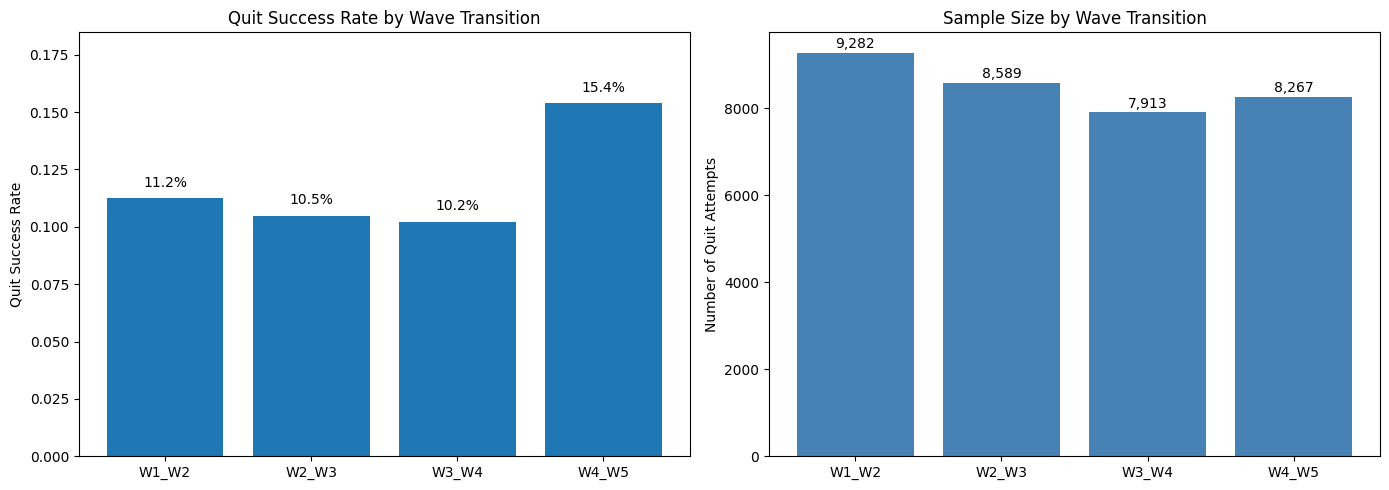

✓ Visualizations saved to reports/figures/


In [30]:
# Visualize cessation rates
if 'pooled_data' in locals():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot by transition
    by_transition_plot = pooled_data.groupby('transition')['quit_success'].mean()
    axes[0].bar(by_transition_plot.index, by_transition_plot.values)
    axes[0].set_ylabel('Quit Success Rate')
    axes[0].set_title('Quit Success Rate by Wave Transition')
    axes[0].set_ylim([0, max(by_transition_plot.values) * 1.2])
    for i, v in enumerate(by_transition_plot.values):
        axes[0].text(i, v + 0.005, f'{v:.1%}', ha='center')
    
    # Sample size by transition
    sample_sizes = pooled_data['transition'].value_counts().sort_index()
    axes[1].bar(sample_sizes.index, sample_sizes.values, color='steelblue')
    axes[1].set_ylabel('Number of Quit Attempts')
    axes[1].set_title('Sample Size by Wave Transition')
    for i, v in enumerate(sample_sizes.values):
        axes[1].text(i, v + 100, f'{v:,}', ha='center')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/phase2_cessation_rates.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Visualizations saved to reports/figures/")

## Step 7: Handle Missing Data

Check for missing values in key variables.

In [31]:
if 'pooled_data' in locals():
    print("MISSING DATA ANALYSIS")
    print("="*60)
    
    # Calculate missingness
    missing_pct = (pooled_data.isnull().sum() / len(pooled_data) * 100).sort_values(ascending=False)
    missing_pct = missing_pct[missing_pct > 0]
    
    if len(missing_pct) > 0:
        print(f"\nVariables with missing data:")
        for var, pct in missing_pct.items():
            print(f"  {var}: {pct:.1f}% missing")
        
        # Flag high missingness
        high_missing = missing_pct[missing_pct > 40]
        if len(high_missing) > 0:
            print(f"\n⚠️  {len(high_missing)} variables have >40% missing (consider excluding)")
    else:
        print("\n✓ No missing data in current variables")
    
    # Handle PATH Study missing codes (-9, -8, -7, -4, -1)
    print("\nNote: PATH Study uses negative values for missing data:")
    print("  -9 = Refused")
    print("  -8 = Don't know / Not ascertained")
    print("  -7 = Don't know")
    print("  -4 = Multiple responses (invalid)")
    print("  -1 = Inapplicable (skip pattern)")
    print("\nThese will be recoded to NaN in Phase 3 (Feature Engineering)")

MISSING DATA ANALYSIS

✓ No missing data in current variables

Note: PATH Study uses negative values for missing data:
  -9 = Refused
  -8 = Don't know / Not ascertained
  -7 = Don't know
  -4 = Multiple responses (invalid)
  -1 = Inapplicable (skip pattern)

These will be recoded to NaN in Phase 3 (Feature Engineering)


## Step 8: Save Pooled Dataset

Save the person-period dataset for use in Phase 3 (Feature Engineering).

In [32]:
if 'pooled_data' in locals():
    # Save to CSV
    output_path = '../data/processed/pooled_transitions.csv'
    pooled_data.to_csv(output_path, index=False)
    
    print("="*60)
    print("PHASE 2 COMPLETE")
    print("="*60)
    print(f"\n✓ Pooled dataset saved to: {output_path}")
    print(f"\nDataset summary:")
    print(f"  - Total observations: {len(pooled_data):,}")
    print(f"  - Unique individuals: {pooled_data[var_mapping['person_id']].nunique():,}")
    print(f"  - Variables: {len(pooled_data.columns)}")
    print(f"  - Quit success rate: {pooled_data['quit_success'].mean():.1%}")
    print(f"\nNext step: Phase 3 - Feature Engineering")
    print(f"See: ACTION_GUIDE.md Phase 3")
else:
    print("❌ Cannot save - pooled data not created yet.")
    print("Fix variable mapping and re-run the cells above.")

PHASE 2 COMPLETE

✓ Pooled dataset saved to: ../data/processed/pooled_transitions.csv

Dataset summary:
  - Total observations: 34,051
  - Unique individuals: 12,993
  - Variables: 10
  - Quit success rate: 11.8%

Next step: Phase 3 - Feature Engineering
See: ACTION_GUIDE.md Phase 3


## Next Steps

Before moving to Phase 3, update `data/data_dictionary.md` with the actual variable names you identified:

1. Document the Person ID variable
2. Document smoking status variables for each wave
3. Document quit attempt variables
4. Document any other key variables you'll use

Then proceed to **Phase 3: Feature Engineering**